In [54]:
import numpy as np
import pandas as pd
#import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (13, 7)
plt.rcParams['font.size'] = 15.0
#plt.rcParams.update({'font.size': 28})
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import brown
import re
import os
import codecs
from sklearn import feature_extraction


In [55]:
hack = pd.read_csv('scrappedData2.csv')

In [56]:
hack

,Attack,Attack_class,Author,Country,Description,Target,Target_class,Year,dat
0,Malware,CC,?,>1,Security researchers discover using the BSSID ...,Multiple targets,Y Multiple Industries,2020,22/12/2020
1,Malware,CC,Conti,US,Gastroenterology Consultants Ltd have some dat...,Gastroenterology Consultants Ltd,Q Human health and social work activities,2020,23/12/2020
2,Malware,CC,Mount Locker,US,Dassault Falcon Jet discloses a data breach af...,Dassault Falcon Jet,C Manufacturing,2020,31/12/2020
3,Malware,CC,Mount Locker,UK,"Amey Plc, the British company providing infras...",Amey PLC,N Administrative and support service activities,2021,01/01/2021
4,Malware,CE,Thallium,KR,Researchers from ESTsecurity reveal that North...,Users of a private stock investment messenger ...,Y Multiple Industries,2021,03/01/2021
...,...,...,...,...,...,...,...,...,...
2505,Unknown,CC,?,US,"Donnelley & Sons, a vendor of NJ Office of Inf...",Donnelley & Sons,"Professional, scientific and technical",2021,29/12/2021
2506,Fake Social Accounts,NaN,?,CN,U.S. online store PulseTV discloses a large-sc...,PulseTV,Individual,2021,30/12/2021
2507,Account Takeover,CC,?,SG,Singapore police warns of a spate of phishing ...,OCBC Customers,Finance and insurance,2021,30/12/2021
2508,Malware,CC,?,US,"New Leaf, Inc., a non-profit provider of servi...","New Leaf, Inc.",Human health and social work,2021,30/12/2021


In [57]:
hack.shape

(2510, 9)

In [58]:
hack['Attack'].value_counts()

Malware                                                                                                                                                                                     964
Unknown                                                                                                                                                                                     509
Account Takeover                                                                                                                                                                            318
Targeted Attack                                                                                                                                                                             151
Vulnerability                                                                                                                                                                                61
                                        

In [59]:
hack['Attack_class'].fillna('CC', inplace=True)


In [60]:
hack['Country'].fillna('US',inplace=True)

In [61]:
hack['Attack'].fillna('Malware',inplace=True)
hack['Target_class'].fillna('Multiple Industries',inplace=True)
hack['Target'].fillna('Accenture',inplace=True)


In [62]:
hack.isnull().sum()

Attack          0
Attack_class    0
Author          0
Country         0
Description     0
Target          0
Target_class    0
Year            0
dat             0
dtype: int64

In [63]:
hack['Attack_class'] = hack['Attack_class'].replace(['H','CC','CE','CW'],['Hacktivism', 'Cyber Crime','Cyber Espionage','Cyber War'])

In [64]:
hack['Attack_class'] = hack['Attack_class'].replace(['Cyber Warfare','>1','CC/CE','CCC','CE?','Cyber  Crime'],['Cyber War', 'Cyber Crime','Cyber Espionage','Cyber Crime','Cyber Crime','Cyber Crime'])

In [65]:
hack['Attack_class'].value_counts()

Cyber Crime        2192
Cyber Espionage     249
Cyber War            40
Hacktivism           29
Name: Attack_class, dtype: int64

In [66]:
hack['Author'].value_counts()

?                                                  1571
Multiple threat actors                               31
Conti                                                30
Clop                                                 25
REvil AKA Sodinokibi                                 21
                                                   ... 
 eCh0raix                                             1
Transparent Tribe, AKA APT36 and Mythic Leopard       1
Conti (AKA Wizard Spider)                             1
Lemon Duck                                            1
AQUATIC PANDA                                         1
Name: Author, Length: 522, dtype: int64

In [67]:
# hack.drop('Author', axis=1, inplace=True)

In [68]:
hack["Attack"].value_counts()

Malware                                                                                                                                                                                     964
Unknown                                                                                                                                                                                     509
Account Takeover                                                                                                                                                                            318
Targeted Attack                                                                                                                                                                             151
Vulnerability                                                                                                                                                                                61
                                        

In [69]:
hack["Country"].value_counts()

US       952
>1       679
UK       100
FR        89
IN        40
        ... 
QA         1
PR         1
UK/US      1
DK         1
AL         1
Name: Country, Length: 108, dtype: int64

In [70]:
hack['Country'] = hack['Country'].replace(['>1'],['RU'])

In [71]:
hack["Country"].unique()

array(['RU', 'US', 'UK', 'KR', 'MX', 'CN', 'CA', 'FR', 'TW', 'BE', 'AU',
       'IL', 'TH', 'NL', 'NZ', 'IN', 'NO', 'CO', 'PK', 'CZ', 'BR', 'OM',
       'US, CA', 'US, DE, AT', 'IE', 'BD', 'ID', 'IT', 'HK', 'IR', 'SG',
       'AR', 'ZA', 'JP', 'TR', 'CH', 'PH', 'MY', 'Multiple targets', 'SE',
       'DE', 'LK', 'US/CA', 'PL', 'PT', 'DZ', 'EU', 'LT', 'MM', 'UA',
       'FI', 'VN', 'AZ', 'AO', '–', 'EC', 'ES', 'NL/UK', 'CL', 'US, IL',
       'RO', 'PS', 'GE', 'AT', '>', 'SK', 'MA', 'JO', 'FJ', 'EE', 'LU',
       'DO', 'QA', 'PR', 'SA', 'UK/US', 'DK', 'KE', 'GR', 'BY', 'TW\nKR',
       'UAE', 'BH', 'AU\nDE', 'SV', 'US\nCA', 'AG', 'TG', 'US\nIL', 'TN',
       'IN\nAF', 'VE', 'PG', 'AU\nTR', 'NI', 'AF', 'SY', 'IT\nFR', 'CF',
       'LY\nSY', 'TZ', 'UG', 'KY', 'KH', 'LA', 'EG', 'AL'], dtype=object)

In [72]:
hack['Target_class'].value_counts()

Y Multiple Industries                                                    337
Q Human health and social work activities                                224
O Public administration and defence, compulsory social security          220
X Individual                                                             177
Multiple Industries                                                      171
M Professional scientific and technical activities                       135
P Education                                                              129
K Financial and insurance activities                                     108
Individual                                                                88
Human health and social work                                              78
N Administrative and support service activities                           68
C Manufacturing                                                           65
J Information and communication                                           63

In [73]:
(hack['Description']=="?").sum()

0

In [74]:
hack['Year'].value_counts()

2021    2503
3021       4
2020       3
Name: Year, dtype: int64

In [75]:
hack['Year'] = hack['Year'].replace(['3021','2020','3022'],['2021', '2021','2022'])

In [76]:
hack[hack['Year']=='3021']

,Attack,Attack_class,Author,Country,Description,Target,Target_class,Year,dat


In [77]:
hack.columns = hack.columns.str.replace('dat','Date')

In [78]:
hack['Attack_class'] = hack['Attack_class'].replace(['H','CC','CE','CW'],['Hacktivism', 'Cyber Crime','Cyber Espionage','Cyber War'])

In [79]:
hack['Attack_class'] = hack['Attack_class'].replace(['H,','CC,CE','CC,','IN','JP','US','Industry: Telco','CW'],['Hacktivism', 'Cyber Crime','Cyber Crime','Cyber Espionage','Cyber Espionage','Cyber Espionage','Cyber Espionage','Cyber Espionage'])

In [80]:
hack['Attack']=[i.replace('?','') for i in hack['Attack']]
hack['Attack']=[i.replace(',\r','') for i in hack['Attack']]

In [81]:
hack.isnull().sum()

Attack          0
Attack_class    0
Author          0
Country         0
Description     0
Target          0
Target_class    0
Year            0
Date            0
dtype: int64

In [82]:
hack['Country'] = hack['Country'].fillna('US')
hack['Target_class'] = hack['Target_class'].fillna('Education')
hack['Target'] = hack['Target'].fillna('Nayana')
hack['Date'] = hack['Date'].fillna('12-06-2015')
# hack['Unnamed: 0']=hack['Unnamed: 0'].fillna('The St. Louis Cardinals baseball franchise is ...	Houston ')
hack['Description']=hack['Description'].fillna('The St. Louis Cardinals baseball franchise is ...	Houston ')

In [83]:
hack.isnull().sum()

Attack          0
Attack_class    0
Author          0
Country         0
Description     0
Target          0
Target_class    0
Year            0
Date            0
dtype: int64

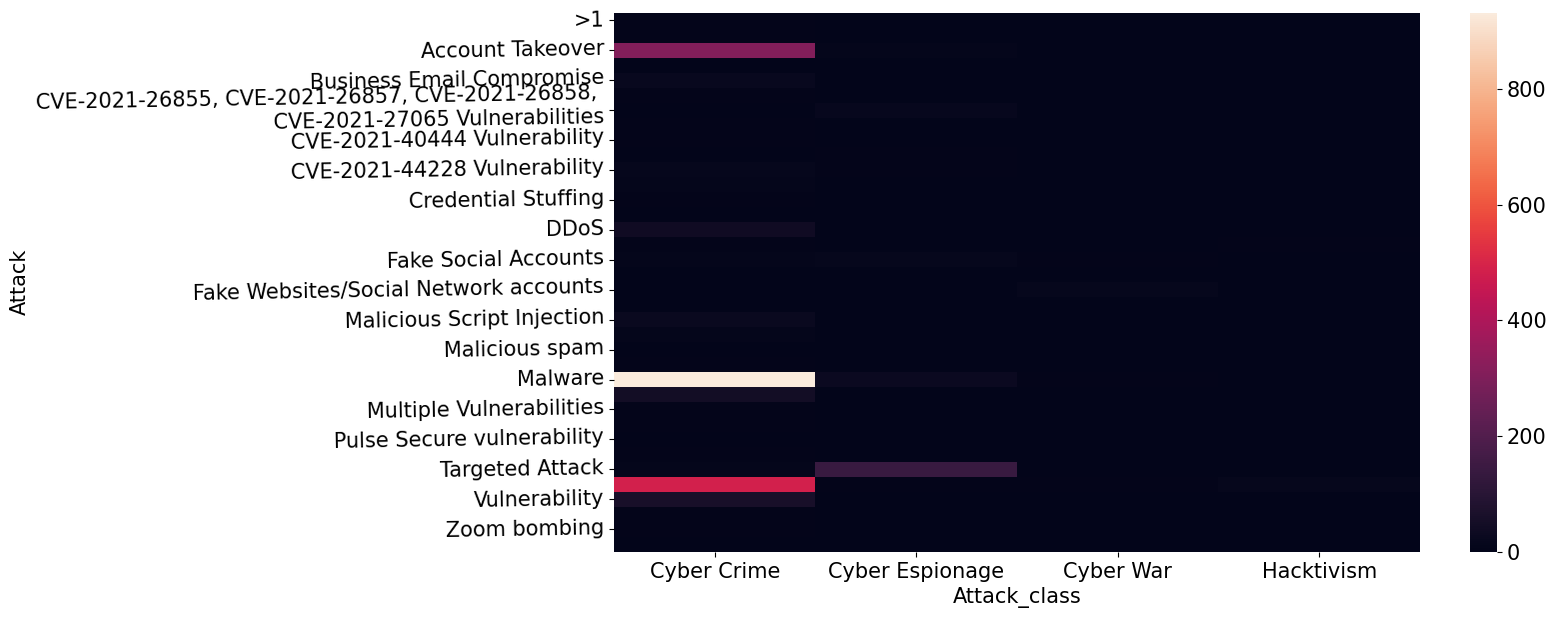

In [84]:
g = hack.groupby(['Attack_class','Attack']).agg({'Target':'count'}).reset_index().sort_values('Target',ascending = False).head(50)
#sns.heatmap(g)
#
test = g.pivot("Attack","Attack_class","Target").fillna(0)

sns.heatmap(test)
plt.yticks(rotation=1)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=8)
#plt.savefig("heatmap.png",bbox_inches='tight')


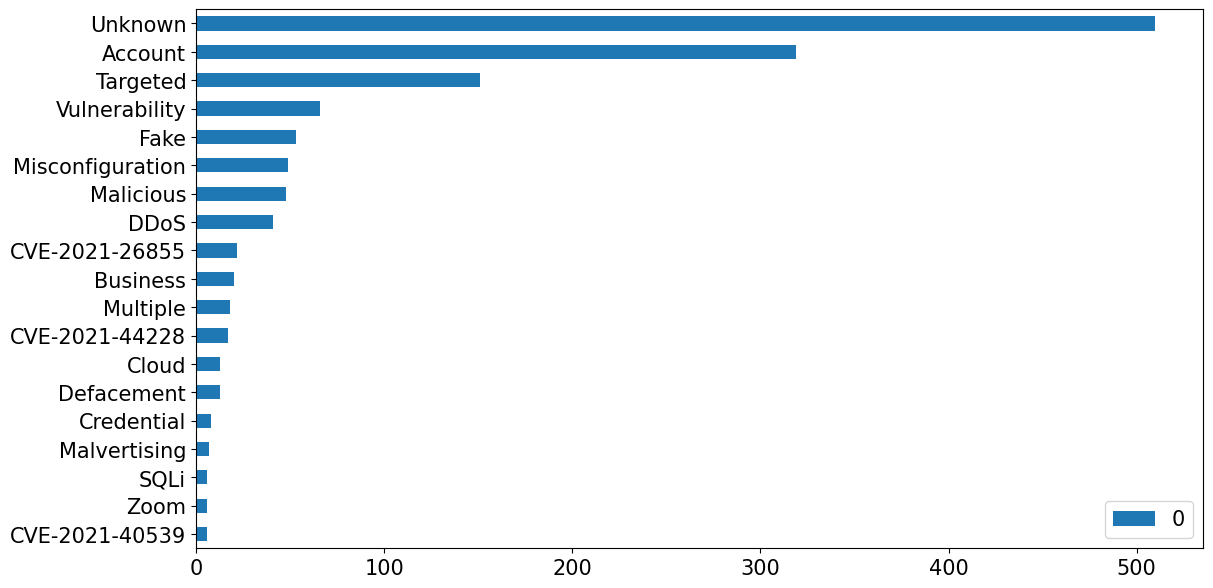

In [85]:
b = [i.split(' ')[0] for i in hack['Attack'].tolist() if type(i) != float]
b = [i.split(',')[0] for i in b if type(i) != float]
b = [i.split(',\r')[0] for i in b if type(i) != float]
b = [str(i).replace('?','') for i in b]

#b.groupby('Attack').agg({'Author':'count'}).reset_index().sort_values('Author', ascending = False)
pd.DataFrame.from_dict(dict(Counter(b)),orient='index').sort_values(0,ascending=True).tail(20)[:-1].plot.barh(grid=False)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=8)
#plt.savefig("top_attack_bar.png",bbox_inches='tight')

In [86]:
hack = hack.replace(['cloudbleed'],['2017'])

In [87]:
descr = hack['Description'].tolist()
tf = [True if (re.findall('million|billion',i) != []) else False for i in descr]

In [88]:
n = [str(i).replace('Industry: ','') for i in hack['Target_class']]
n = [str(i).replace('Org: ','') for i in n]

In [89]:
hack['Target_class'] = n
hack

,Attack,Attack_class,Author,Country,Description,Target,Target_class,Year,Date
0,Malware,Cyber Crime,?,RU,Security researchers discover using the BSSID ...,Multiple targets,Y Multiple Industries,2020,22/12/2020
1,Malware,Cyber Crime,Conti,US,Gastroenterology Consultants Ltd have some dat...,Gastroenterology Consultants Ltd,Q Human health and social work activities,2020,23/12/2020
2,Malware,Cyber Crime,Mount Locker,US,Dassault Falcon Jet discloses a data breach af...,Dassault Falcon Jet,C Manufacturing,2020,31/12/2020
3,Malware,Cyber Crime,Mount Locker,UK,"Amey Plc, the British company providing infras...",Amey PLC,N Administrative and support service activities,2021,01/01/2021
4,Malware,Cyber Espionage,Thallium,KR,Researchers from ESTsecurity reveal that North...,Users of a private stock investment messenger ...,Y Multiple Industries,2021,03/01/2021
...,...,...,...,...,...,...,...,...,...
2505,Unknown,Cyber Crime,?,US,"Donnelley & Sons, a vendor of NJ Office of Inf...",Donnelley & Sons,"Professional, scientific and technical",2021,29/12/2021
2506,Fake Social Accounts,Cyber Crime,?,CN,U.S. online store PulseTV discloses a large-sc...,PulseTV,Individual,2021,30/12/2021
2507,Account Takeover,Cyber Crime,?,SG,Singapore police warns of a spate of phishing ...,OCBC Customers,Finance and insurance,2021,30/12/2021
2508,Malware,Cyber Crime,?,US,"New Leaf, Inc., a non-profit provider of servi...","New Leaf, Inc.",Human health and social work,2021,30/12/2021


In [90]:
hack['Author'] = hack['Author'].replace('?', 'unknown')


In [91]:
hack['Country'] = hack['Country'].replace('>1', 'IN')


In [92]:
hack

,Attack,Attack_class,Author,Country,Description,Target,Target_class,Year,Date
0,Malware,Cyber Crime,unknown,RU,Security researchers discover using the BSSID ...,Multiple targets,Y Multiple Industries,2020,22/12/2020
1,Malware,Cyber Crime,Conti,US,Gastroenterology Consultants Ltd have some dat...,Gastroenterology Consultants Ltd,Q Human health and social work activities,2020,23/12/2020
2,Malware,Cyber Crime,Mount Locker,US,Dassault Falcon Jet discloses a data breach af...,Dassault Falcon Jet,C Manufacturing,2020,31/12/2020
3,Malware,Cyber Crime,Mount Locker,UK,"Amey Plc, the British company providing infras...",Amey PLC,N Administrative and support service activities,2021,01/01/2021
4,Malware,Cyber Espionage,Thallium,KR,Researchers from ESTsecurity reveal that North...,Users of a private stock investment messenger ...,Y Multiple Industries,2021,03/01/2021
...,...,...,...,...,...,...,...,...,...
2505,Unknown,Cyber Crime,unknown,US,"Donnelley & Sons, a vendor of NJ Office of Inf...",Donnelley & Sons,"Professional, scientific and technical",2021,29/12/2021
2506,Fake Social Accounts,Cyber Crime,unknown,CN,U.S. online store PulseTV discloses a large-sc...,PulseTV,Individual,2021,30/12/2021
2507,Account Takeover,Cyber Crime,unknown,SG,Singapore police warns of a spate of phishing ...,OCBC Customers,Finance and insurance,2021,30/12/2021
2508,Malware,Cyber Crime,unknown,US,"New Leaf, Inc., a non-profit provider of servi...","New Leaf, Inc.",Human health and social work,2021,30/12/2021


In [93]:
hack['Author'].unique()

array(['unknown', 'Conti', 'Mount Locker', 'Thallium',
       'APT27, AKA TG-3390, Emissary Panda, BRONZE UNION, Iron Tiger, and LuckyMouse.',
       'Multiple threat actors', 'FIN7', 'Earth Wendigo', 'Babuk Locker',
       'Avaddon', 'APT37 AKA ScarCruft, Reaper, and Group123', 'Egregor',
       'ALTDOS', 'TA551, AKA Shathak', 'TeamTNT',
       'Charming Kitten (APT35 or Phosphorus)', 'REvil AKA Sodinokibi',
       'Triangulum', 'Chimera', 'At least 40 cybercriminal gangs',
       'Winnti group (AKA APT41)', 'Oink and Stuff',
       'Iranian threat actors',
       'Russian, Iranian and Chinese influence actors', 'DeroHE', '>',
       'StellarParticle (AKA UNC2452, Dark Halo)', 'FreakOut', 'Ryuk',
       'ShinyHunters', 'Nefilim', 'CursedGrabber', 'Clop', 'ZINC',
       'Nemty', 'Volatile Cedar AKA Lebanese Cedar', 'Rocke Group',
       'Trickbot', 'Vovalex', 'Turkish hackers', 'Sharp Boys',
       'Vice Society', 'cfk AKA @AnibalLeaks', 'Anonymois', 'Sangkancil',
       'John Brinns',

In [94]:
hack['Country'].unique()

array(['RU', 'US', 'UK', 'KR', 'MX', 'CN', 'CA', 'FR', 'TW', 'BE', 'AU',
       'IL', 'TH', 'NL', 'NZ', 'IN', 'NO', 'CO', 'PK', 'CZ', 'BR', 'OM',
       'US, CA', 'US, DE, AT', 'IE', 'BD', 'ID', 'IT', 'HK', 'IR', 'SG',
       'AR', 'ZA', 'JP', 'TR', 'CH', 'PH', 'MY', 'Multiple targets', 'SE',
       'DE', 'LK', 'US/CA', 'PL', 'PT', 'DZ', 'EU', 'LT', 'MM', 'UA',
       'FI', 'VN', 'AZ', 'AO', '–', 'EC', 'ES', 'NL/UK', 'CL', 'US, IL',
       'RO', 'PS', 'GE', 'AT', '>', 'SK', 'MA', 'JO', 'FJ', 'EE', 'LU',
       'DO', 'QA', 'PR', 'SA', 'UK/US', 'DK', 'KE', 'GR', 'BY', 'TW\nKR',
       'UAE', 'BH', 'AU\nDE', 'SV', 'US\nCA', 'AG', 'TG', 'US\nIL', 'TN',
       'IN\nAF', 'VE', 'PG', 'AU\nTR', 'NI', 'AF', 'SY', 'IT\nFR', 'CF',
       'LY\nSY', 'TZ', 'UG', 'KY', 'KH', 'LA', 'EG', 'AL'], dtype=object)